
# Feedback would be greatly appreciated 

As Coronavirus spreads to the world and cancels sporting events including the IPL thereby rendering my Hotstar membership moot .So as a budding data-scientist I decided to substitute to IPL window with a Data visualization project of my own . I found the data set of all IPL games from 2008-2019 on [Kaggle](https://www.kaggle.com/nowke9/ipldata). 

## **The data set contained two csv file** 

**Matches.csv** : Information of all matches played in the IPL from 2008-2019 providing the below information 

>        id 
       season	 
       city	 
       date	 
       team1	
       team2	
       toss_winner
       toss_decision
       result
       dl_applied
       winner
       win_by_runs
       win_by_wickets
       player_of_match
       venue
       umpire1
       umpire2
       umpire3

**Deliveries.csv** : Information of all balls bowled and it runs scored on it . This data set would be covered in depth in a separate part 2 notebook 


 ## **Data Collection and Cleaning**

As the data set was found on Kaggle it was quite clean . Even then I used functions like **.shape()**,  **isnull()**, **dtypes** , **head()** to explore the data and check if there was any null values. 

### Below are my observations<br>

>        Third Umpire column is mostly filled by NaNs

>        First and Second umpire for two matches where not known

>        Missing city values I was able to fill using the venue information from the dataset

>        The date format for 2008-2017 was %y%m%d and the date format for 2018-2019 %y%d%m

>        Data for Rising Pune Supergaints and Rising Pune Supergaint same team but re-branding by adding a 's' to the end of the name was combined 
 
>        Similar thing was done for Delhi Capitals and Delhi Daredevils 


## **Data Visualization**

### This Matches.csv file is throught explored to get the following insights 

>       Matches played across season 
      Matches played by each team
      Matches played in each city 
      Matches played in each stadium 
      Percentage of toss won by each team 
      Decision after toss win Overall 
      Decision after toss season wise 
      Percentage of wins after for each team after winning the toss
      Most common umpire pair across 10 season 
      Most Man-of-Match Wins<br>
      Function to compute head to head wins between each team 
      100 big wins batting first 
      100 big wins batting second 



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
base_color=sns.color_palette()[8]
sns.set(style="whitegrid")
%matplotlib inline 


C:\Users\T1941SS\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
matches=pd.read_csv('./matches.csv')

In [3]:
print("Matches shape{}".format(matches.shape))

Matches shape(756, 18)


In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:

#Checking null values 
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## We see there are 7 city location empty on further exploring the venue for the NAN are same 'Dubai International Cricket Stadium so I assume the city for the NAN should be Dubai 

In [6]:
matches[matches.city.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [7]:
matches.city.fillna('Dubai ',inplace=True)

# Lets Explore the match dataset via different visulaizations 

## Lets start by plotting matches played across season and also matches played by each team 
## Now we do not have a direct number for matches played by each team . However summing up the occurance of team name in team 1 and team 2 column should give us the total number of matches across each team across seasons 

## We see that Rising Pune Supergaint and Rising Pune Supergaints are the same team just that there was name change in their second season so we need combine data for that team 

## Also Delhi capitals and Delhi Daredevils are the same team just rebranding so it would better to combine their data under Delhi Capital name 

In [8]:
matches.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)

matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)


# Matches Played Across Seasons and Total Matches Played by Each Team  

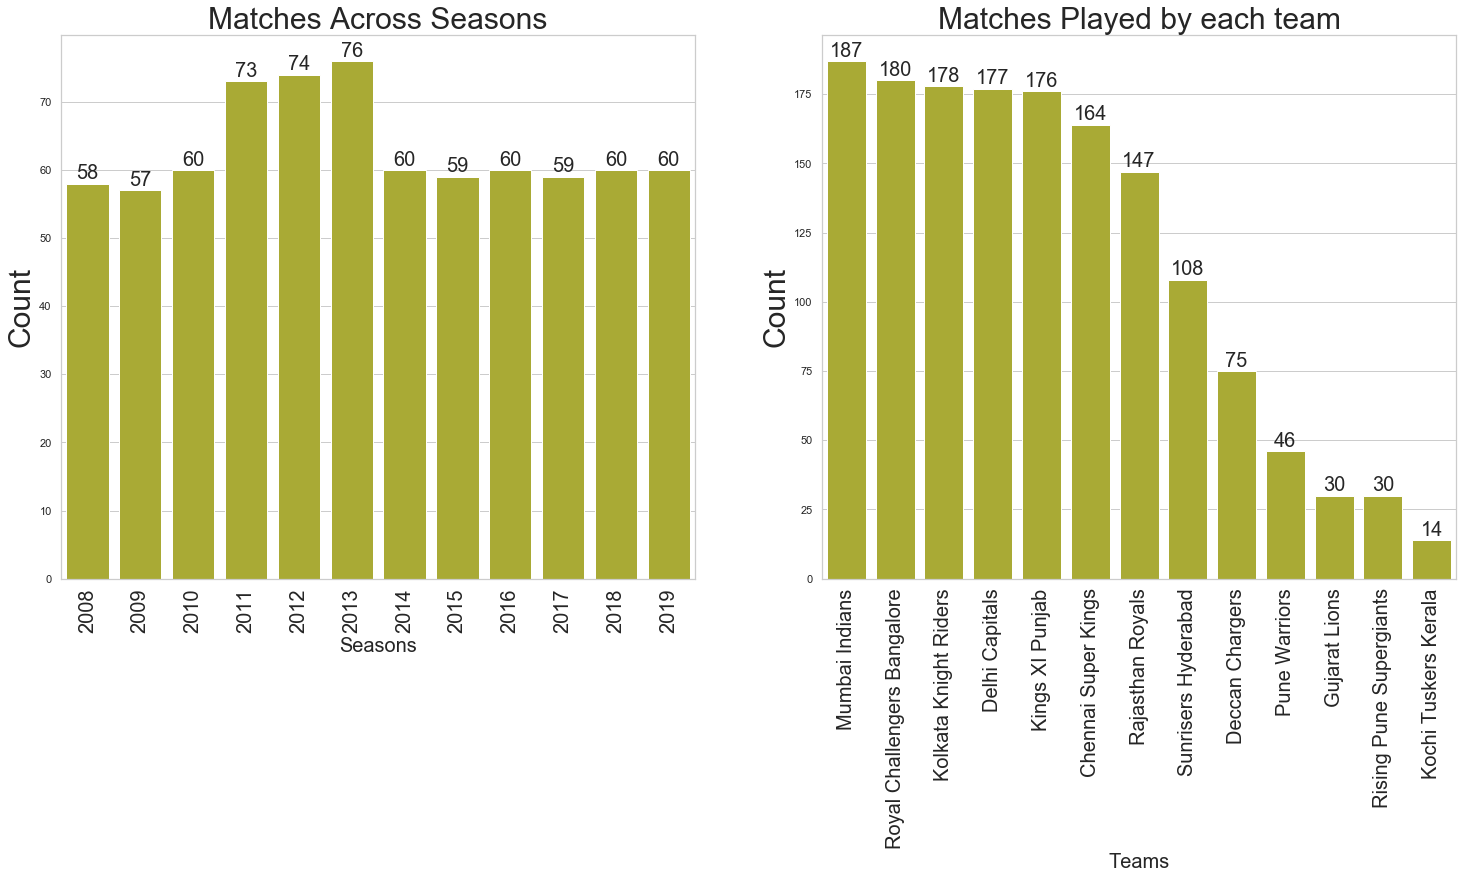

In [9]:
#Modifying Data so as to plot second graph
team_1=matches.groupby(['team1']).count()
team_2=matches.groupby(['team2']).count()
total_matches=team_1['id']+team_2['id']
total_matches=pd.DataFrame(total_matches,columns=['id'])
total_matches.reset_index(inplace=True)

total_matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
total_matches.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)

plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
splot=sns.countplot(data=matches,x='season',color=base_color)

plt.title('Matches Across Seasons',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Seasons',fontsize=20)

# add annotations
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=20)
    
    
plt.subplot(1,2,2)

splot=sns.barplot(data=total_matches,x='team1',y='id',color=base_color,order=total_matches.sort_values(by=['id'],ascending=False)['team1'])

plt.title('Matches Played by each team',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Teams',fontsize=20)

# add annotations
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=20)

# Observation 

## The above charts shows us how the matches where distributed across seasons . The higher number of matches in season 2011,2012 and 2013 where due to extra two teams added to the competitions 


## Also we see that Mumbai Indians have played the most matches



# Matches In Each City 

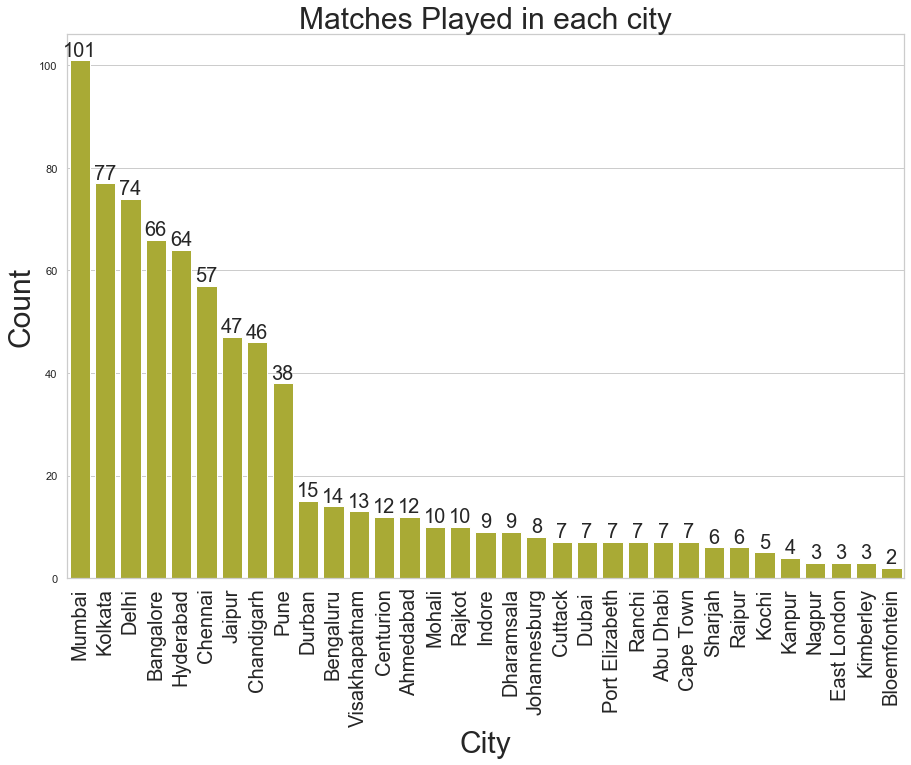

In [10]:
plt.figure(figsize=(15,10))

splot=sns.countplot(data=matches,x='city',color=base_color,order=matches['city'].value_counts().index)

plt.title('Matches Played in each city',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xlabel('City',fontsize=30)
plt.xticks(rotation=90,fontsize=20)

# add annotations
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=20)

# Observation 

## The reason mumbai dominates over other city could be as some season semi-final and final are played in mumbai

## Also mumbai team plays all its matches in one city unlike other teams who re allocate its home games to different cities 

# Stadium wise distribution 

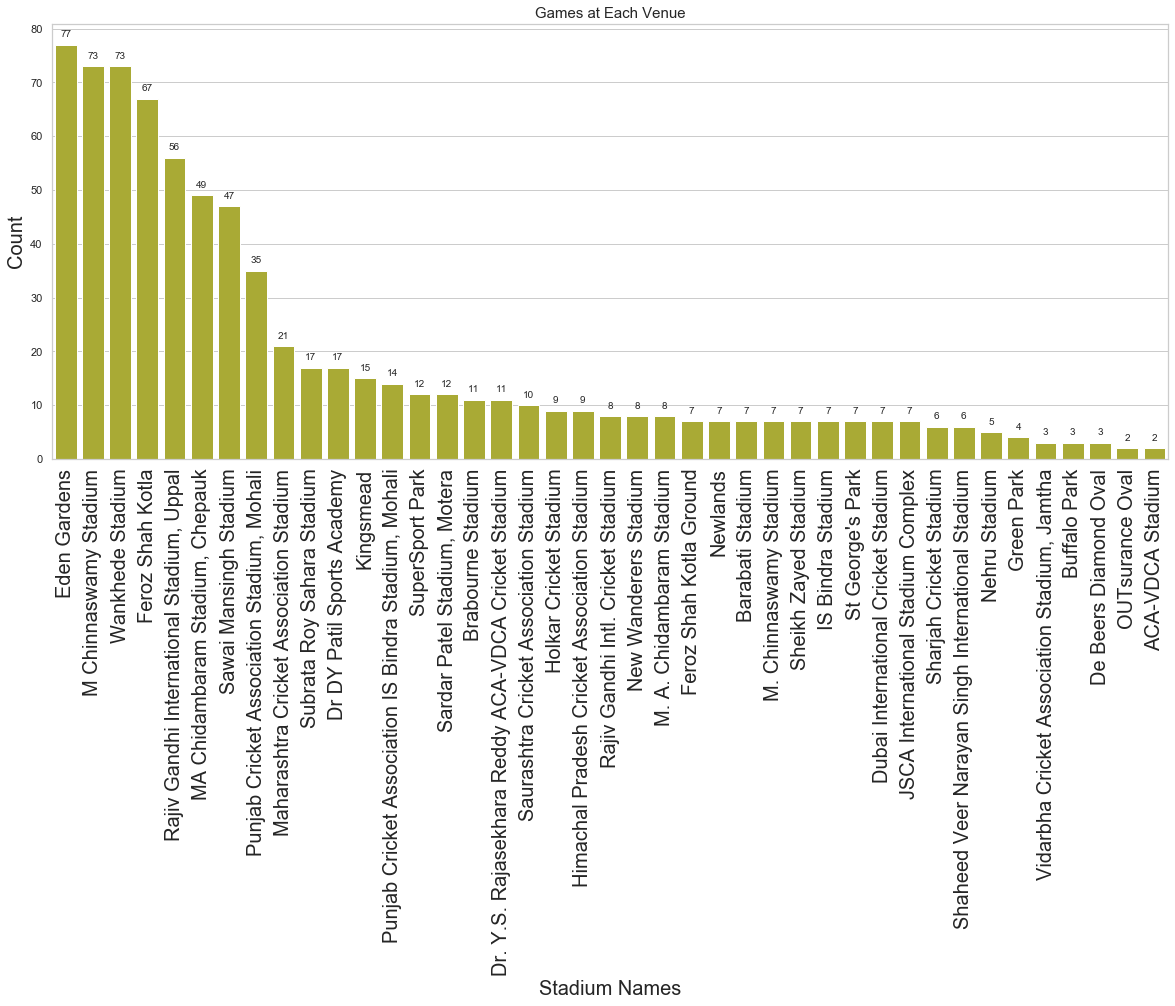

In [11]:
plt.figure(figsize=(20,8))
splot=sns.countplot(data=matches,x='venue',color=base_color,order=matches['venue'].value_counts().index)
plt.xticks(rotation=90,fontsize=20);
plt.title('Games at Each Venue',fontsize=15);
plt.ylabel('Count',fontsize=20);
plt.xlabel('Stadium Names',fontsize=20);

for p in splot.patches:
    splot.annotate(format((p.get_height()), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=10)

# Percent of Toss Won By Each Team 

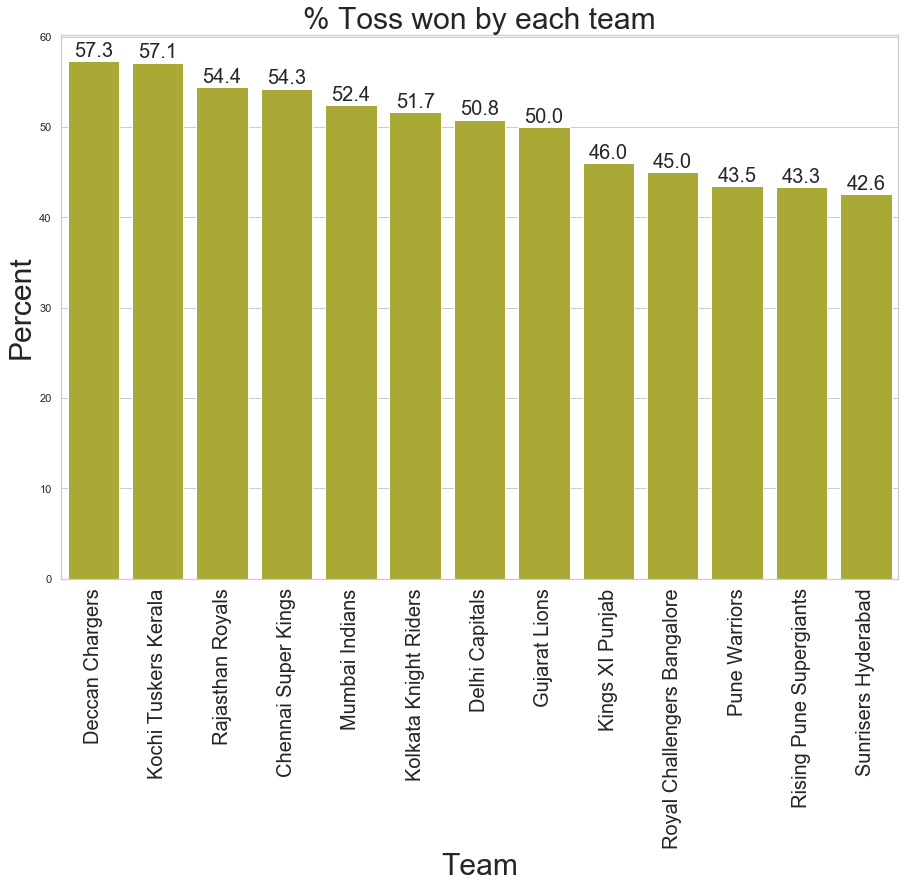

In [12]:
#Creating a columns for Toss Win percent in total match dataframe which we created above 

total_matches['percent_toss_wins']=(matches.groupby('toss_winner').count()['toss_decision'].values/total_matches['id'].values)*100


plt.figure(figsize=(15,10))
#base_color=sns.color_palette()[7]
splot=sns.barplot(data=total_matches,x='team1',y='percent_toss_wins',color=base_color,order=total_matches.sort_values(by=['percent_toss_wins'],ascending=False)['team1'])

plt.title('% Toss won by each team',fontsize=30)
plt.ylabel('Percent',fontsize=30)
plt.xlabel('Team',fontsize=30)
plt.xticks(rotation=90,fontsize=20)

# add annotations
for p in splot.patches:
    splot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=20)

# Observation 

## We see that Deccan Chargers( now defunt team ) had the most successfull toss winning percent 

# Decision after winning the toss. Do team prefer setting a target or chasing ?

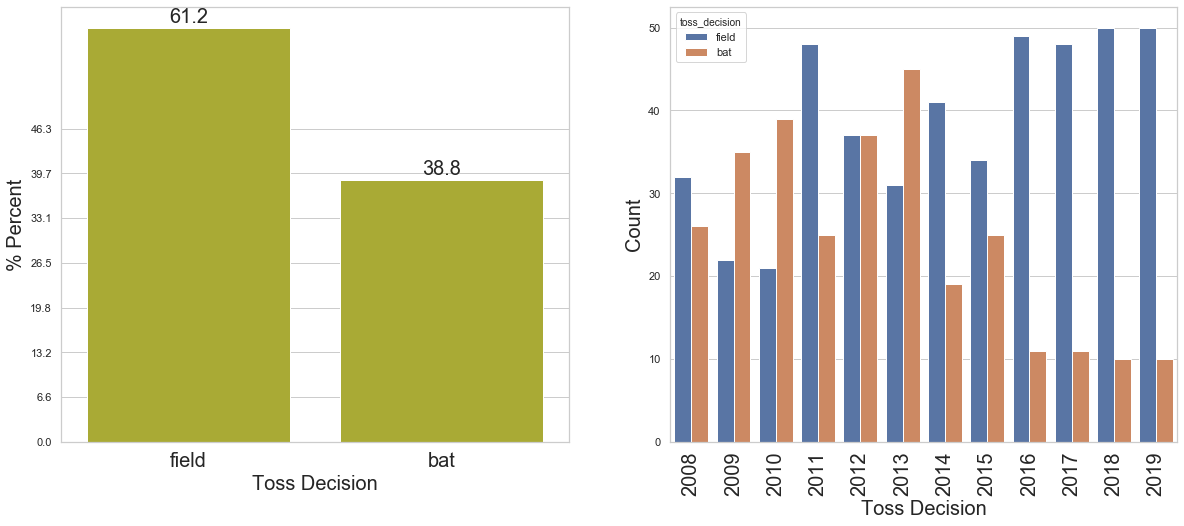

In [13]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ticks=[0,50,100,150,200,250,300,350]
labels=[(x/matches.shape[0])*100 for x in ticks];
labels=['%.1f' % elem for elem in labels ]
splot=sns.countplot(data=matches,x='toss_decision',color=base_color)
plt.yticks(ticks,labels);
plt.xlabel('Toss Decision',fontsize=20);
plt.ylabel('% Percent',fontsize=20);
plt.xticks(fontsize=20);

for p in splot.patches:
    splot.annotate(format((p.get_height()/matches.shape[0])*100, ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=20)
    
plt.subplot(1,2,2)
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.xlabel('Toss Decision',fontsize=20);
plt.xticks(rotation=90,fontsize=20);
plt.ylabel('Count',fontsize=20);

# Obervation 

## We see higher percentage of teams prefer chasing overall across all seasons
## Also we see that the prefer to chase or bat changes according to seasons 


# Toss Decision Broken Team Wise 

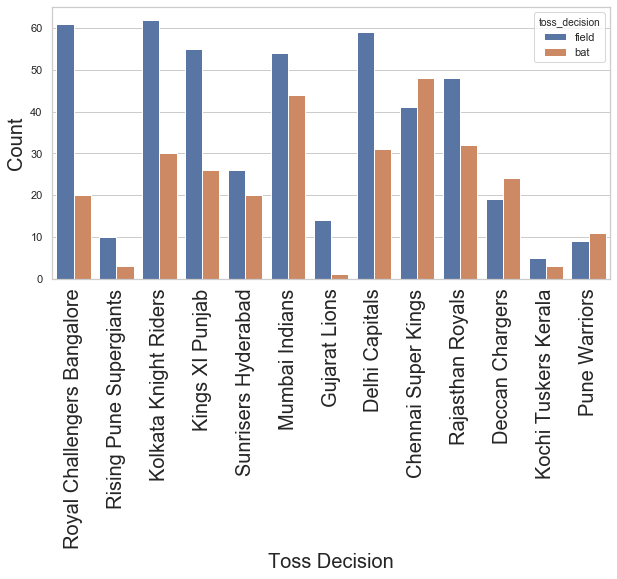

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='toss_winner',hue='toss_decision',data=matches)
plt.xlabel('Toss Decision',fontsize=20);
plt.xticks(rotation=90,fontsize=20);
plt.ylabel('Count',fontsize=20);

# Obervation 

## Most team prefer to chase apart from Deccan Chargers , Pune Warriors ( Now defunct) and Chennai Super Kings 

# Does winning the toss means winning the match ?

In [15]:
Team_list=['Mumbai Indians','Kings XI Punjab', 'Chennai Super Kings','Royal Challengers Bangalore','Kolkata Knight Riders','Delhi Capitals','Rajasthan Royals',                
            'Sunrisers Hyderabad' ,'Deccan Chargers', 'Pune Warriors', 'Rising Pune Supergiants','Gujarat Lions', 'Kochi Tuskers Kerala']


total_toss_wins=matches.groupby(['toss_winner']).count()                                             #counts for team winning the toss 
match_wins=matches[matches.winner==matches.toss_winner].groupby(['toss_winner','winner']).count()  # Counts for team winning the toss and winnng the match 
percent_wins={}

for Team in Team_list:
    percent_wins.update({Team : (match_wins.loc[Team]['id']/total_toss_wins.loc[Team]['id']).values[0]*100} )
    

toss_and_game_win=pd.DataFrame.from_dict(percent_wins,orient='index',columns=['percent']).reset_index()

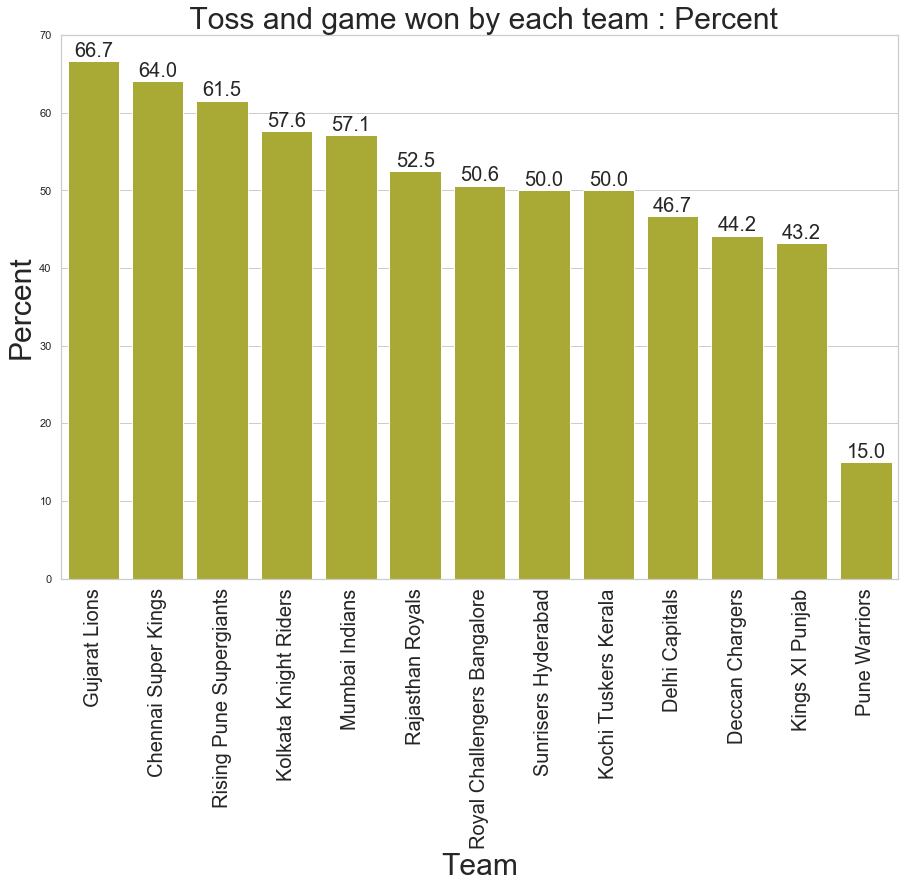

In [16]:
plt.figure(figsize=(15,10))
#base_color=sns.color_palette()[7]
splot=sns.barplot(data=toss_and_game_win,x='index',y='percent',color=base_color,order=toss_and_game_win.sort_values(by=['percent'],ascending=False)['index'])

plt.title(' Toss and game won by each team : Percent',fontsize=30)
plt.ylabel('Percent',fontsize=30)
plt.xlabel('Team',fontsize=30)
plt.xticks(rotation=90,fontsize=20)

# add annotations
for p in splot.patches:
    splot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=20)

## The above graph shows us the percentage a team wins the match if it has won the toss . For most team winning the toss is an advantage 

# Top 10 umpire combinations 

In [17]:
# Dropping Null values for umpire 
matches.dropna(subset=['umpire1'],inplace=True,axis=0)

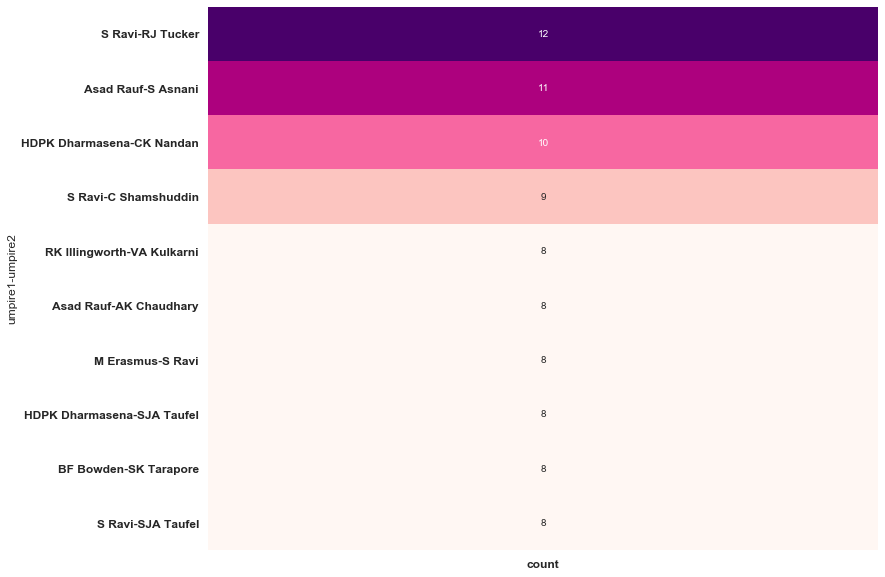

In [18]:
fig4, ax = plt.subplots(figsize=(12, 10))
ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=12, weight='bold');
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, weight='bold');
cbar_kws = {'orientation':"horizontal", 'pad':0.08, 'aspect':50};
top=10
sns.heatmap(data=matches.groupby(['umpire1','umpire2']).size().to_frame('count').sort_values(by='count',ascending=False).head(top),annot=True,cmap='RdPu',ax=ax,cbar=False);

## More umpire can be plotted but I am restricting it to top 10 . You can just change top parameter in the cell 

# Most Man of Match awards won

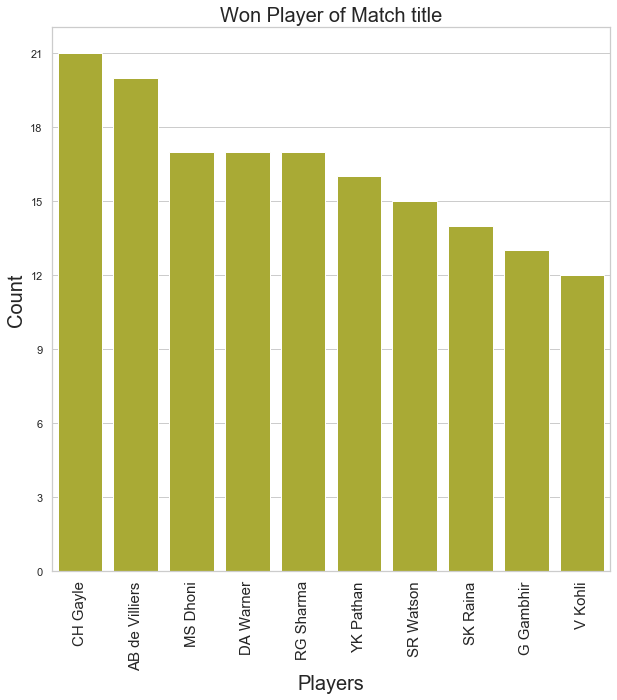

In [19]:
#Making a dataframe for plotting top 10 player of match award winners 
Player_of_match=pd.DataFrame(matches.groupby('player_of_match').count()['id'].sort_values(ascending=False).head(10),columns=['id']).reset_index()

plt.figure(figsize=(10,10));
ticks=[0,3,6,9,12,15,18,21]
#base_color=sns.color_palette()[5]
sns.barplot(y='id',x='player_of_match',data=Player_of_match,color=base_color);
plt.xticks(rotation=90);
plt.yticks(ticks,ticks);
plt.xticks(fontsize=15);
plt.title('Won Player of Match title',fontsize=20);
plt.ylabel('Count',fontsize=20);
plt.xlabel('Players',fontsize=20);

# Function to compute the head to head wins between teams 

In [20]:
def head_to_head(df,team1,team2):
    """
    Function which computes the head to head winner between two teams 
    
    Input : Dataframe , str of team 1 and team 2 names 
    eg: headtohead(matches,'Mumbai Indians','Delhi Capitals')
    
    output : Prints a table for head to head winner
    
    
Team names can be selected among 

Mumbai Indians                 
Kings XI Punjab                 
Chennai Super Kings             
Royal Challengers Bangalore     
Kolkata Knight Riders       
Delhi Capitals                  
Rajasthan Royals                
Sunrisers Hyderabad             
Deccan Chargers                 
Pune Warriors                   
Rising Pune Supergiants         
Gujarat Lions                   
Kochi Tuskers Kerala             
    
    """
    
    
    wins=df[(((df['team1']==team1) | (df['team2']==team1)) & ((df['team1']==team2)|(df['team2']==team2)))]
    
    print(wins.groupby('winner').count()['id'])
                                                         

In [21]:
head_to_head(matches,'Mumbai Indians','Delhi Capitals')

winner
Delhi Capitals    12
Mumbai Indians    12
Name: id, dtype: int64


In [22]:
head_to_head(matches,'Mumbai Indians','Kolkata Knight Riders')

winner
Kolkata Knight Riders     6
Mumbai Indians           19
Name: id, dtype: int64


# 100 Biggest wins while chasing

# The color of dot indicates the magnitude of the win 

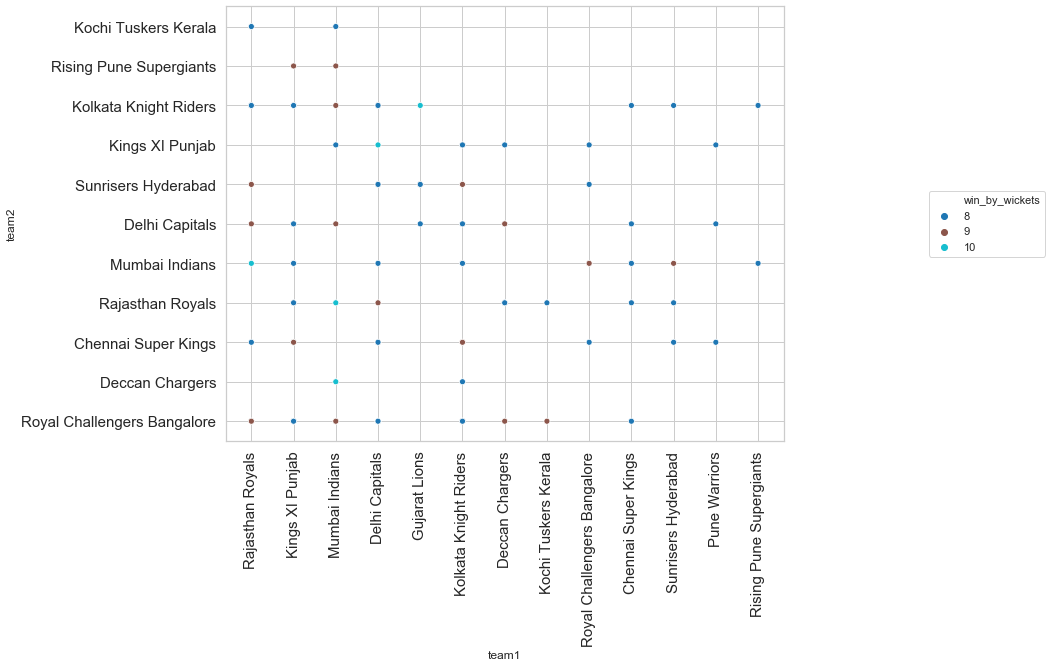

In [23]:

plt.figure(figsize=(10,8))
g=sns.scatterplot(x='team1',y='team2',data=matches.sort_values(by='win_by_wickets',ascending=False,).head(100),hue='win_by_wickets', palette='tab10');
plt.xticks(rotation=90,fontsize=15);
plt.yticks(fontsize=15);
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

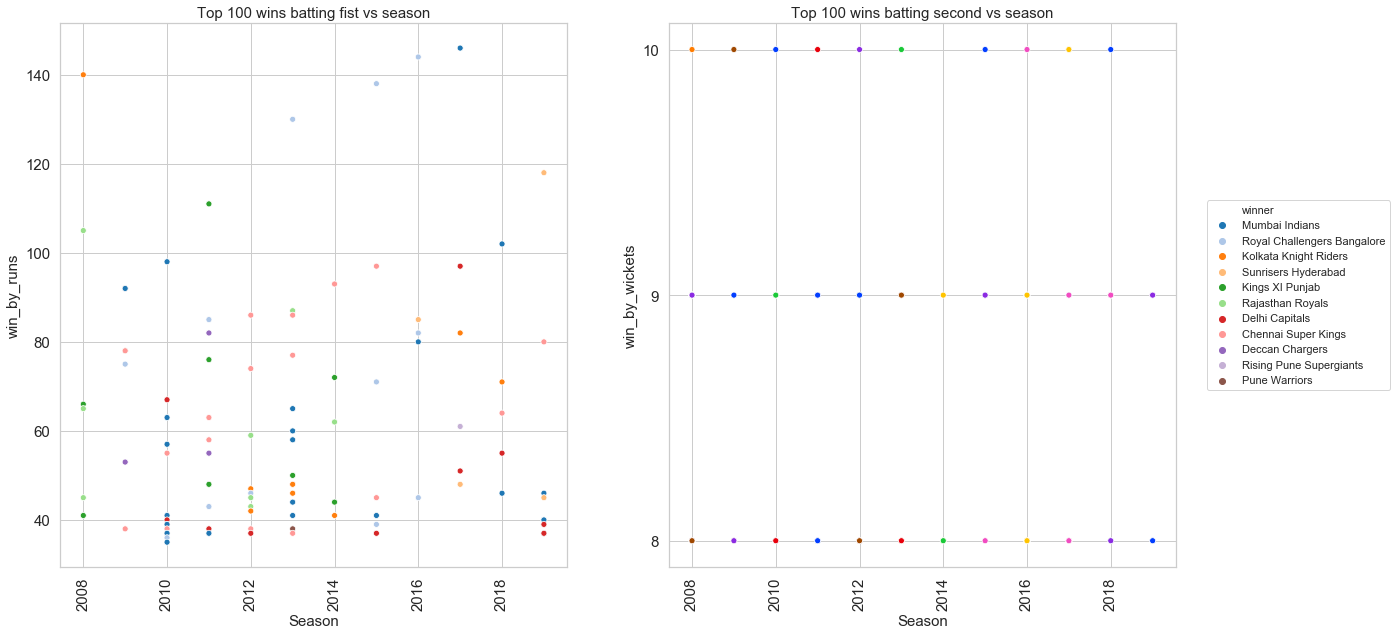

In [24]:
fig=plt.figure(figsize=(20,10))
axes=plt.subplot(1,2,2)
g=sns.scatterplot(x='season',y='win_by_wickets',data=matches.sort_values(by='win_by_wickets',ascending=False,).head(100),hue='winner', palette='bright',legend=False);
plt.xticks(rotation=90,fontsize=15);
plt.yticks([10,9,8],fontsize=15);

plt.xlabel('Season',fontsize=15);
plt.ylabel('win_by_wickets',fontsize=15);
plt.title('Top 100 wins batting second vs season',fontsize=15);

plt.subplot(1,2,1)
g=sns.scatterplot(x='season',y='win_by_runs',data=matches.sort_values(by='win_by_runs',ascending=False,).head(100),hue='winner', palette='tab20');
plt.xticks(rotation=90,fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Season',fontsize=15);
plt.ylabel('win_by_runs',fontsize=15);
plt.title('Top 100 wins batting fist vs season',fontsize=15);
g.legend(loc='center left', bbox_to_anchor=(2.25, 0.5), ncol=1);

